# Running DA with the Command Line Interface (CLI)

## Generating the `configs.yml` file

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks')
import cfr
print(cfr.__version__)
import numpy as np

2024.4.4


In [2]:
job = cfr.ReconJob()

Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:03<00:00, 27.18it/s]


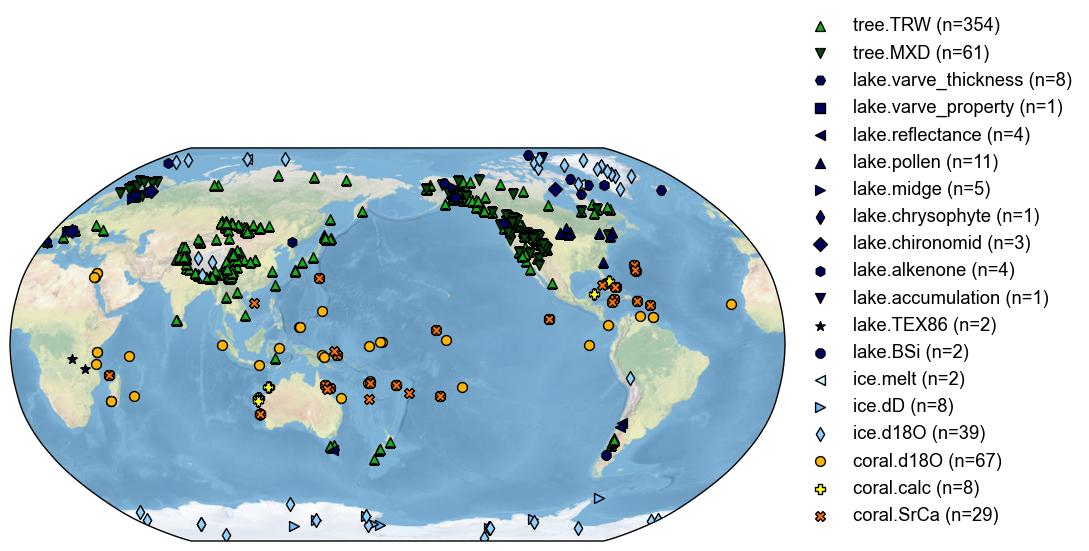

In [34]:
job.load_proxydb('PAGES2kv2')
# job.filter_proxydb(by='ptype', keys=['coral', 'tree', 'ice', 'lake', 'marine'])
job.filter_proxydb(by='ptype', keys=['coral', 'tree', 'ice', 'lake'])
# job.filter_proxydb(by='ptype', keys=['coral.d18O', 'coral.SrCa', 'tree.TRW', 'tree.MXD', 'ice.d18O', 'lake.varve_thickness'])
job.annualize_proxydb(months=np.arange(1, 13), ptypes=['coral'])
fig, ax = job.proxydb.plot()

In [32]:
# model prior: fetching & preprocessing
job.load_clim(tag='prior', path_dict={'tas': 'iCESM_past1000historical/tas', 'pr': 'iCESM_past1000historical/pr'}, anom_period=[1951, 1980])
job.load_clim(tag='obs', path_dict={'tas': 'gistemp1200_GHCNv4_ERSSTv5', 'pr': '20CRv3/pr'}, anom_period=[1951, 1980], rename_dict={'tas': 'tempanomaly', 'pr': 'prate'})

>>> The target file seems existed at: ./data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...
>>> The target file seems existed at: ./data/prate.mon.mean.nc . Loading from it instead of downloading ...


In [35]:
# proxy system modeling
job.calib_psms(
    ptype_psm_dict={
        'tree.MXD': 'Linear',
        'tree.TRW': 'Bilinear',
        'coral.d18O': 'Linear',
        'coral.SrCa': 'Linear',
        'coral.calc': 'Linear',
        'ice.d18O': 'Linear',
        'ice.dD': 'Linear',
        'ice.melt': 'Linear',
        'lake.varve_thickness': 'Linear',
    },
    ptype_clim_dict={
        'tree.MXD': ['tas'],
        'tree.TRW': ['tas', 'pr'],
        'coral.d18O': ['tas'],
        'coral.SrCa': ['tas'],
        'coral.calc': ['tas'],
        'ice.d18O': ['tas'],
        'ice.dD': ['tas'],
        'ice.melt': ['tas'],
        'lake.varve_thickness': ['tas'],
    },
    ptype_season_dict={
        'tree.MXD': [
            [1,2,3,4,5,6,7,8,9,10,11,12],
            [6,7,8],
            [3,4,5,6,7,8],
            [6,7,8,9,10,11],
            [-12,1,2],
            [-9,-10,-11,-12,1,2],
            [-12,1,2,3,4,5]
        ],  # multiple possible seasonalities
        'tree.TRW': [
            [1,2,3,4,5,6,7,8,9,10,11,12],
            [6,7,8],
            [3,4,5,6,7,8],
            [6,7,8,9,10,11],
            [-12,1,2],
            [-9,-10,-11,-12,1,2],
            [-12,1,2,3,4,5]
        ],  # multiple possible seasonalities
        'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
        'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
        'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
        'ice.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
        'ice.dD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
        'ice.melt': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
        'lake.varve_thickness': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # annual
    },
    calib_period=[1850, 2015],
)


Calibrating the PSMs:   3%|▎         | 19/610 [00:00<00:18, 31.84it/s]

The number of overlapped data points is 14 < 25. Skipping ...
The number of overlapped data points is 20 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...


Calibrating the PSMs:   5%|▌         | 31/610 [00:00<00:17, 32.30it/s]

The number of overlapped data points is 9 < 25. Skipping ...
The number of overlapped data points is 24 < 25. Skipping ...


Calibrating the PSMs:   9%|▉         | 55/610 [00:01<00:17, 32.51it/s]

The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  13%|█▎        | 79/610 [00:02<00:16, 32.56it/s]

The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs:  18%|█▊        | 110/610 [00:11<04:43,  1.76it/s]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')
Calibrating the PSMs:  18%|█▊        | 112/610 [00:13<05:21,  1.55it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  19%|█▉        | 116/610 [00:17<07:36,  1.08it/s]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  20%|██        | 122/610 [00:25<10:26,  1.28s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  22%|██▏       | 137/610 [00:51<15:00,  1.90s/it]

The number of overlapped data points is 9 < 25. Skipping ...


Calibrating the PSMs:  24%|██▍       | 146/610 [01:05<12:01,  1.56s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  25%|██▍       | 151/610 [01:13<13:12,  1.73s/it]

The number of overlapped data points is 12 < 25. Skipping ...


Calibrating the PSMs:  28%|██▊       | 171/610 [01:45<10:30,  1.44s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  32%|███▏      | 198/610 [02:21<08:51,  1.29s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 1 < 25. Skipping ...


Calibrating the PSMs:  35%|███▍      | 211/610 [02:45<12:48,  1.93s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 8 < 25. Skipping ...


Calibrating the PSMs:  35%|███▌      | 215/610 [02:51<11:11,  1.70s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  36%|███▌      | 220/610 [02:57<09:48,  1.51s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  41%|████      | 251/610 [03:35<10:32,  1.76s/it]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  41%|████▏     | 253/610 [03:37<08:25,  1.41s/it]

The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs:  42%|████▏     | 258/610 [03:43<07:46,  1.33s/it]

The number of overlapped data points is 6 < 25. Skipping ...
The number of overlapped data points is 6 < 25. Skipping ...


Calibrating the PSMs:  47%|████▋     | 287/610 [04:27<08:14,  1.53s/it]

The number of overlapped data points is 6 < 25. Skipping ...


Calibrating the PSMs:  47%|████▋     | 289/610 [04:29<06:59,  1.31s/it]

The number of overlapped data points is 18 < 25. Skipping ...


Calibrating the PSMs:  51%|█████     | 310/610 [04:56<08:37,  1.72s/it]

The number of overlapped data points is 5 < 25. Skipping ...


Calibrating the PSMs:  52%|█████▏    | 315/610 [05:02<07:22,  1.50s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 11 < 25. Skipping ...


Calibrating the PSMs:  52%|█████▏    | 319/610 [05:06<06:01,  1.24s/it]

The number of overlapped data points is 6 < 25. Skipping ...
The number of overlapped data points is 9 < 25. Skipping ...


Calibrating the PSMs:  54%|█████▍    | 330/610 [05:20<07:46,  1.67s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  55%|█████▌    | 338/610 [05:28<03:58,  1.14it/s]

The number of overlapped data points is 6 < 25. Skipping ...


Calibrating the PSMs:  57%|█████▋    | 346/610 [05:39<06:51,  1.56s/it]

The number of overlapped data points is 19 < 25. Skipping ...


Calibrating the PSMs:  57%|█████▋    | 350/610 [05:43<05:33,  1.28s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')
/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')
Calibrating the PSMs:  64%|██████▍   | 389/610 [06:43<06:07,  1.66s/it]

The number of overlapped data points is 3 < 25. Skipping ...


Calibrating the PSMs:  64%|██████▍   | 391/610 [06:45<04:56,  1.35s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')
/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...
The number of overlapped data points is 5 < 25. Skipping ...
The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  66%|██████▌   | 401/610 [06:57<04:50,  1.39s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')
/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...
The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  66%|██████▋   | 405/610 [07:01<04:09,  1.22s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  67%|██████▋   | 407/610 [07:03<03:59,  1.18s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  71%|███████   | 434/610 [07:36<02:50,  1.03it/s]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  73%|███████▎  | 448/610 [07:54<04:12,  1.56s/it]

The number of overlapped data points is 5 < 25. Skipping ...


Calibrating the PSMs:  77%|███████▋  | 472/610 [08:35<04:29,  1.96s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 8 < 25. Skipping ...


Calibrating the PSMs:  81%|████████  | 493/610 [09:07<03:27,  1.78s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 2 < 25. Skipping ...


Calibrating the PSMs:  84%|████████▍ | 515/610 [09:36<02:19,  1.47s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 2 < 25. Skipping ...


Calibrating the PSMs:  88%|████████▊ | 535/610 [10:13<02:27,  1.96s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  88%|████████▊ | 538/610 [10:15<01:29,  1.24s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  90%|█████████ | 552/610 [10:34<01:14,  1.29s/it]/glade/u/home/fengzhu/Github/cfr/cfr/psm.py:116: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = df_proxy.dropna().merge(df_exog.dropna(), how='inner', on='time')


The number of overlapped data points is 1 < 25. Skipping ...


Calibrating the PSMs:  96%|█████████▌| 584/610 [11:22<00:29,  1.13s/it]

The number of overlapped data points is 9 < 25. Skipping ...


Calibrating the PSMs:  99%|█████████▉| 605/610 [11:50<00:07,  1.49s/it]

The number of overlapped data points is 10 < 25. Skipping ...


Calibrating the PSMs: 100%|██████████| 610/610 [11:56<00:00,  1.17s/it]


The number of overlapped data points is 0 < 25. Skipping ...


Forwarding the PSMs:   0%|          | 0/558 [00:00<?, ?it/s]


KeyError: 'coral.calc'

In [36]:
job.forward_psms()

# model prior: processing
job.annualize_clim(tag='prior', months=[12, 1, 2])
job.regrid_clim(tag='prior', nlat=42, nlon=63)
job.crop_clim(tag='prior', lat_min=-35, lat_max=35)


Forwarding the PSMs: 100%|██████████| 558/558 [02:33<00:00,  3.63it/s]


In [37]:
# paleo data assimilation
job.run_da_mc(save_dirpath='./recons/test-run-da-cfg', recon_seeds=list(range(1, 2)))

KF updating: 100%|██████████| 2001/2001 [07:57<00:00,  4.19it/s]


>>> DONE! Total time spent: 8.09 mins.


In [38]:
job.save_cfg('./recons/test-run-da-cfg')

## Testing running the reconstruction job based on the generated `configs.yml` file

In [ ]:
job_cfg = cfr.ReconJob()
job_cfg.run_da_cfg('./recons/test-run-da-cfg/configs.yml', run_mc=True, verbose=True)

## Leveraging the CLI

In [ ]:
!cfr -h

In [ ]:
!cfr da -c ./recons/test-run-da-cfg/configs.yml -vb -s 1 2 -r